In [14]:
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
df=pd.read_csv('bank_new.csv')
df

,id,age,job,marital,education,default,amount,housing,loan,contact,day,month,duration,campaign,previous,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,370.055237,1,0,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,233.998933,10,0,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,NaN,1,2,0
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,252.525808,1,0,0
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,NaN,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27123,27124,42,blue-collar,married,primary,no,1455,yes,no,cellular,2,feb,246.943522,2,2,0
27124,27125,34,services,single,secondary,no,719,yes,no,sending _document,15,may,NaN,3,0,1
27125,27126,36,blue-collar,single,primary,no,49,yes,no,sending _document,8,may,303.008360,1,0,0
27126,27127,33,housemaid,married,primary,no,209,no,no,cellular,12,aug,258.334424,4,0,1


In [6]:
df2 = pd.get_dummies(df,drop_first=True,dtype=int)

In [7]:
train_val,test=train_test_split(df2,test_size=0.2,random_state=0)

In [8]:
train_val.isnull().sum()

id                              0
age                             0
amount                          0
day                             0
duration                     5633
campaign                        0
previous                        0
y                               0
job_blue-collar                 0
job_entrepreneur                0
job_housemaid                   0
job_management                  0
job_retired                     0
job_self-employed               0
job_services                    0
job_student                     0
job_technician                  0
job_unemployed                  0
job_unknown                     0
marital_married                 0
marital_single                  0
education_secondary             0
education_tertiary              0
education_unknown               0
default_yes                     0
housing_yes                     0
loan_yes                        0
contact_sending _document       0
contact_telephone               0
month_aug     

In [9]:
is_null=train_val['duration'].isnull()
train_val.loc[(is_null)&(train_val['age']<30)&(train_val['y']==1),'duration']=train_val.loc[(train_val['age']<30)&(train_val['y']==1)].mean()
train_val.loc
for i in [20,30,40,50,60,70,80,90]:
    train_val.loc[(is_null)&(train_val['age']>=i)&(train_val['age']<(i+10))&(train_val['y']==1),'duration']=train_val.loc[(train_val['age']>=i)&(train_val['age']<(i+10))&(train_val['y']==1)].mean()
for i in [20,30,40,50,60,70,80,90]:
    train_val.loc[(is_null)&(train_val['age']>=i)&(train_val['age']<(i+10))&(train_val['y']==0),'duration']=train_val.loc[(train_val['age']>=i)&(train_val['age']<(i+10))&(train_val['y']==0)].mean()    

In [10]:
def learn(x,t):
    x_train,x_val,y_train,y_val=train_test_split(x,t,test_size=0.2,random_state=8)
    y_train=pd.DataFrame(y_train)
    y_val=pd.DataFrame(y_val)
    model=RandomForestClassifier(n_estimators=200, random_state=0, max_depth=8)
    model.fit(x_train,y_train)
    train_score=model.score(x_train,y_train)
    val_score=model.score(x_val,y_val)
    return train_score,val_score


In [25]:
x=train_val.drop(['y','id','day'],axis=1)
t=train_val['y']
t = t.ravel()

C:\Users\user\AppData\Local\Temp\ipykernel_15500\3553216289.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  t = t.ravel()


In [26]:
train_val.corr()['y']

id                           0.007684
age                          0.098362
amount                      -0.010718
day                          0.023362
duration                     0.282816
campaign                     0.146778
previous                     0.022087
y                            1.000000
job_blue-collar              0.039722
job_entrepreneur             0.025596
job_housemaid               -0.013447
job_management              -0.012109
job_retired                  0.024693
job_self-employed           -0.011199
job_services                 0.006090
job_student                 -0.051178
job_technician              -0.013109
job_unemployed              -0.030056
job_unknown                 -0.001891
marital_married              0.055259
marital_single              -0.066403
education_secondary          0.000303
education_tertiary          -0.027016
education_unknown            0.008918
default_yes                 -0.022746
housing_yes                  0.197832
loan_yes    

In [27]:
a,b=learn(x,t)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [28]:
print(a,b)

0.8186164391452105 0.7892190739460954


In [113]:
corr_train_val = train_val.corr()['y'].sort_values(ascending=False).map(abs)
corr_train_val = corr_train_val.drop(index = 'y')
corr_train_val

duration                     0.282816
housing_yes                  0.197832
campaign                     0.146778
contact_sending _document    0.131849
age                          0.098362
month_may                    0.097815
loan_yes                     0.096758
marital_married              0.055259
job_blue-collar              0.039722
month_jun                    0.030101
job_entrepreneur             0.025596
job_retired                  0.024693
day                          0.023362
previous                     0.022087
education_unknown            0.008918
id                           0.007684
job_services                 0.006090
month_mar                    0.006006
month_dec                    0.003989
education_secondary          0.000303
job_unknown                  0.001891
month_sep                    0.001970
contact_telephone            0.002135
month_oct                    0.005010
month_jul                    0.007862
amount                       0.010718
job_self-emp

In [114]:
x.columns

Index(['age', 'amount', 'duration', 'campaign', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_sending _document',
       'contact_telephone', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')

In [115]:
x1 = x.drop(columns = ['job_services','month_mar','month_dec','education_secondary', 'job_unknown', 'month_sep', 'contact_telephone', 'month_oct', 'month_jul'])

In [116]:
learn(x1,t)

(0.8652727377455216, 0.8256162174614144)

In [117]:
tuple(corr_train_val.index)

('duration',
 'housing_yes',
 'campaign',
 'contact_sending _document',
 'age',
 'month_may',
 'loan_yes',
 'marital_married',
 'job_blue-collar',
 'month_jun',
 'job_entrepreneur',
 'job_retired',
 'day',
 'previous',
 'education_unknown',
 'id',
 'job_services',
 'month_mar',
 'month_dec',
 'education_secondary',
 'job_unknown',
 'month_sep',
 'contact_telephone',
 'month_oct',
 'month_jul',
 'amount',
 'job_self-employed',
 'job_management',
 'job_technician',
 'job_housemaid',
 'default_yes',
 'education_tertiary',
 'job_unemployed',
 'month_feb',
 'month_jan',
 'job_student',
 'month_nov',
 'month_aug',
 'marital_single')

In [130]:
current_elements = []
for element in tuple(corr_train_val.index):
    current_elements.append(element) 
    print(learn(train_val[current_elements],t))

(0.7263406485801509, 0.6993780234968902)
(0.7748401589770174, 0.7576595254549643)
(0.7882034445020448, 0.7751670122091684)
(0.8050227521456137, 0.7850725639253628)
(0.825586083750936, 0.7958995623128311)
(0.8281204999711999, 0.7979728173231975)
(0.8600887045677093, 0.8286109191430546)
(0.8600887045677093, 0.8283805574752361)
(0.8596279016185704, 0.8279198341395991)
(0.8591094983007891, 0.8258465791292329)
(0.8592246990380739, 0.8246947707901405)
(0.8584182938770808, 0.8256162174614144)
(0.8603191060422787, 0.8272287491361437)
(0.864696734059098, 0.8279198341395991)
(0.8648695351650251, 0.8281501958074177)
(0.8651575370082368, 0.8256162174614144)
(0.8659063418005876, 0.8272287491361437)
(0.8660215425378722, 0.8269983874683253)
(0.8656759403260181, 0.8269983874683253)
(0.8659063418005876, 0.8274591108039622)
(0.8657911410633028, 0.8267680258005068)
(0.8658487414319451, 0.8265376641326884)
(0.8656759403260181, 0.8272287491361437)
(0.8652727377455216, 0.8265376641326884)
(0.866655146592938

1
(0.7030124992799954, 0.6970744068187054)
2
(0.6462185357986291, 0.6512324349228289)
3
(0.6462185357986291, 0.6512324349228289)
4
(0.7463279764990496, 0.7415342087076711)
5
(0.7735153504982432, 0.7707901405206173)
6
(0.8260468867000749, 0.8122552407279429)
7
(0.8322101261448073, 0.816171389080857)
8
(0.8611831115719141, 0.8322967058281502)
9
(0.8665975462242959, 0.8263073024648698)
10
(0.882495247969587, 0.8242340474545036)
11
(0.8920569091642186, 0.816171389080857)
12
(0.9138874488796729, 0.8191660907624971)
13
(0.9285755428834744, 0.8071872840359364)
14
(0.9444732446287656, 0.8023496890117484)
15
(0.9582973331029319, 0.8044229440221147)
16
(0.9664189850815045, 0.8000460723335637)
17
(0.9764990495939174, 0.8048836673577516)
18
(0.9831230919877887, 0.8048836673577516)
19
(0.9882495247969587, 0.8058051140290255)


In [129]:
learn(x,t)

(0.8665975462242959, 0.8263073024648698)

In [120]:
x2=train_val[['duration', 'housing_yes', 'campaign', 'contact_sending _document']]
learn(x2, t)

(0.8050227521456137, 0.7850725639253628)

<Axes: xlabel='duration', ylabel='age'>

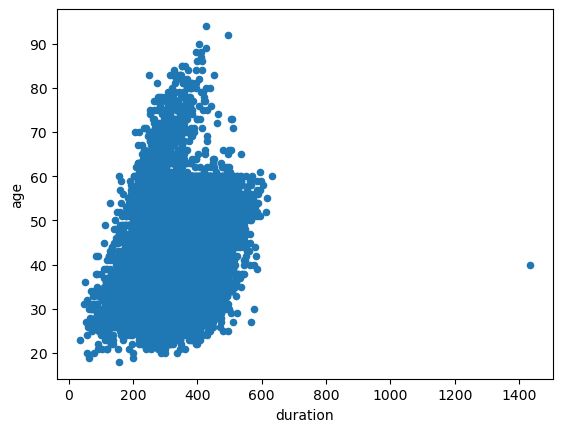

In [121]:
train_val.plot(kind='scatter',x='duration',y='age')

In [2]:
# pandasのバージョン
import pandas as pd
print("pandas version:", pd.__version__)

# scikit-learnのバージョン
import sklearn
print("scikit-learn version:", sklearn.__version__)

# matplotlibのバージョン
import matplotlib
print("matplotlib version:", matplotlib.__version__)


pandas version: 2.2.2
scikit-learn version: 1.5.1
matplotlib version: 3.9.2


In [1]:
import sys
print(sys.version)


3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
